<div style="display: flex; justify-content: center;">
  <img src="C:\Users\RASHID\Downloads\Professional LinkedIn Lead Generation Tips to Grow High-Quality Leads.jpg"
       style="width: 100%; height: auto; border-radius:10px; background-color:#f0f0f0;">
</div>

<div style="background-color:gold; color:blue; padding:15px; border-radius:8px; text-align:center; font-size:24px; font-weight:bold;">
     EXPLORATIVE DATA ANALYSIS (EDA) AND PREDICTION OF SYNTHETIC_FREELANCE_JOBS DATASET
</div>




<div style="background-color:blue; color:gold; padding:15px; border-radius:8px; text-align:center; font-size:24px; font-weight:bold;">
    IMPORT LIBRARIES
</div>


In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,OrdinalEncoder
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler,MaxAbsScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import lightgbm as lgb 


<div style="background-color:blue; color:gold; padding:12px; border-radius:8px; text-align:center; font-size:22px; font-weight:bold;">
    LOADING DATASET
</div>


In [2]:
job_df=pd.read_csv(r"C:\Users\RASHID\Downloads\archive\synthetic_freelance_jobs.csv")

In [3]:
job_df

,job_id,job_title,job_description,category,posted_date,budget_usd,duration_days,num_applicants,hired,freelancer_rating,completion_time_days,success
0,JOB00001,English to Spanish,This project involves english to spanish in th...,Translation,2025-07-17,599.34,13,3,True,4.1,14.0,True
1,JOB00002,Mobile App Development,This project involves mobile app development i...,Development,2025-10-12,702.10,12,4,False,NaN,NaN,False
2,JOB00003,English to Spanish,This project involves english to spanish in th...,Translation,2025-10-09,385.72,7,6,True,3.7,5.0,True
3,JOB00004,UI/UX Design,This project involves ui/ux design in the fiel...,Design,2025-11-19,619.54,7,4,True,3.9,10.0,True
4,JOB00005,Model Training,This project involves model training in the fi...,Data Science,2025-06-01,558.21,5,4,False,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...
995,JOB00996,Promo Video Creation,This project involves promo video creation in ...,Video Editing,2025-10-03,415.47,2,10,True,3.4,8.0,True
996,JOB00997,German to Italian,This project involves german to italian in the...,Translation,2025-07-26,719.76,1,7,False,NaN,NaN,False
997,JOB00998,Model Training,This project involves model training in the fi...,Data Science,2025-09-11,597.77,1,6,False,NaN,NaN,False
998,JOB00999,Blog Writing,This project involves blog writing in the fiel...,Writing,2025-06-25,410.22,2,10,True,4.0,4.0,True


<div style="background-color:blue; color:gold; padding:15px; border-radius:8px; text-align:center; font-size:24px; font-weight:bold;">
     CHECKING SHAPE, COLUMNS, INFO AND DESCRIBE
</div>


In [4]:
job_df.shape

(1000, 12)

In [5]:
job_df.columns

Index(['job_id', 'job_title', 'job_description', 'category', 'posted_date',
       'budget_usd', 'duration_days', 'num_applicants', 'hired',
       'freelancer_rating', 'completion_time_days', 'success'],
      dtype='object')


| **Column Name**          | **Description**                                                    |
| ------------------------ | ------------------------------------------------------------------ |
| **job_id**               | Unique identifier for each job.                                    |
| **job_title**            | The title or name of the job.                                      |
| **job_description**      | Detailed text describing job tasks and requirements.               |
| **category**             | The job’s type or category (e.g., writing, design).                |
| **posted_date**          | Date when the job was posted.                                      |
| **budget_usd**           | The job’s budget in US dollars.                                    |
| **duration_days**        | Expected duration of the job in days.                              |
| **num_applicants**       | Number of freelancers who applied for the job.                     |
| **hired**                | Whether a freelancer was hired (1 = yes, 0 = no).                  |
| **freelancer_rating**    | Rating of the hired freelancer (if applicable).                    |
| **completion_time_days** | Actual number of days taken to complete the job.                   |
| **success**              | Indicates if the job was successfully completed (1 = yes, 0 = no). |


| **Column**               | **Importance** | **Reason**                                                                   |
| ------------------------ | -------------- | ---------------------------------------------------------------------------- |
| **budget_usd**           | ⭐⭐⭐⭐           | Higher budgets often attract better freelancers and lead to better outcomes. |
| **duration_days**        | ⭐⭐⭐⭐           | Jobs with realistic timelines are more likely to be completed successfully.  |
| **num_applicants**       | ⭐⭐⭐            | More applicants can increase the chance of finding a good match.             |
| **hired**                | ⭐⭐⭐⭐           | If no one is hired, the job cannot be completed.                             |
| **freelancer_rating**    | ⭐⭐⭐⭐           | Higher-rated freelancers usually deliver higher-quality work.                |
| **completion_time_days** | ⭐⭐⭐            | Very long or very short completion times can indicate issues.                |
| **category**             | ⭐⭐             | Some job types have higher or lower success rates.                           |
| **job_description**      | ⭐⭐             | Clear descriptions can influence project success.                            |
| **job_title**            | ⭐              | Small importance; mostly text context.                                       |
| **posted_date**          | ⭐              | May matter only if trends change over time.                                  |
| **job_id**               | ⭐              | Identifier only — no predictive value.                                       |


In [6]:
job_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   job_id                1000 non-null   object 
 1   job_title             1000 non-null   object 
 2   job_description       1000 non-null   object 
 3   category              1000 non-null   object 
 4   posted_date           1000 non-null   object 
 5   budget_usd            1000 non-null   float64
 6   duration_days         1000 non-null   int64  
 7   num_applicants        1000 non-null   int64  
 8   hired                 1000 non-null   bool   
 9   freelancer_rating     707 non-null    float64
 10  completion_time_days  707 non-null    float64
 11  success               1000 non-null   bool   
dtypes: bool(2), float64(3), int64(2), object(5)
memory usage: 80.2+ KB


In [7]:
job_df.describe()

,budget_usd,duration_days,num_applicants,freelancer_rating,completion_time_days
count,1000.000000,1000.000000,1000.000000,707.000000,707.000000
mean,515.062160,9.416000,6.796000,4.175106,9.577086
std,197.310282,9.861653,2.502928,0.474568,9.706351
min,50.000000,1.000000,0.000000,2.800000,1.000000
25%,375.340000,2.000000,5.000000,3.800000,3.000000
50%,514.220000,6.000000,7.000000,4.200000,7.000000
75%,654.502500,13.000000,8.000000,4.500000,13.000000
max,1155.280000,71.000000,16.000000,5.000000,65.000000


<div style="background-color:blue; color:gold; padding:12px; border-radius:8px; text-align:center; font-size:22px; font-weight:bold;">
    # EDA
</div>


In [8]:
# CHECKING UNIQUE VALUES OF EACH COLUMNS

In [143]:
for i in job_df.columns:
    print(i,':-')
    print(job_df[i].unique())

category :-
[0.66666667 0.33333333 0.16666667 0.         0.83333333 1.
 0.5       ]
budget_usd :-
[0.49701433 0.58998625 0.30374204 0.51529024 0.45980204 0.29213412
 0.54713738 0.30975861 0.37497286 0.35303272 0.57277794 0.35430841
 0.37794948 0.85286081 0.26683736 0.54703785 0.24077157 0.64366495
 0.28409091 0.1869481  0.56612804 0.4944358  0.23956825 0.65720903
 0.8259717  0.06925847 0.7950836  0.70774826 0.63638173 0.54730928
 0.68635097 0.41815649 0.4579835  0.66997503 0.68812428 0.38358606
 0.28062572 0.31540424 0.46339389 0.67410068 0.49629053 0.58510061
 0.14424399 0.58274826 0.62055769 0.32223509 0.25732846 0.65479336
 0.19302801 0.4012196  0.31415569 0.26367074 0.28051715 0.
 0.23120838 0.28873227 0.21944666 0.29386219 0.47775224 0.08054068
 0.91086422 0.20271786 0.42280689 0.59440142 0.55721627 0.45204835
 0.34424761 0.24027396 0.4577935  0.65058628 0.6009337  0.38016611
 0.26253981 0.20680732 0.206174   0.20283548 0.44959648 0.72645845
 0.08985054 0.09768565 0.48100934 0.691

<div style="background-color:blue; color:gold; padding:12px; border-radius:8px; text-align:center; font-size:22px; font-weight:bold;">
    DATA PREPROCESSING
</div>


<div style="background-color:#FFE5B4; color:gold; padding:15px; border-radius:8px; text-align:center; font-size:24px; font-weight:bold;">
    MISSING VALUES HANDLING
</div>


In [10]:
# CHECKING MISSING VALUES IN EACH COLUMNS

In [11]:
job_df.isna().sum()

job_id                    0
job_title                 0
job_description           0
category                  0
posted_date               0
budget_usd                0
duration_days             0
num_applicants            0
hired                     0
freelancer_rating       293
completion_time_days    293
success                   0
dtype: int64

In [12]:
columns=['freelancer_rating','completion_time_days']
for x in columns:
    print(x,':-')
    print(job_df[x].unique())
    

freelancer_rating :-
[4.1 nan 3.7 3.9 3.4 4.  3.8 4.4 5.  4.3 3.5 4.7 4.2 4.5 4.9 4.8 4.6 3.2
 2.9 3.1 3.6 3.3 3.  2.8]
completion_time_days :-
[14. nan  5. 10.  4.  3.  1. 20. 17.  7.  2. 28.  8.  9.  6. 27. 15. 52.
 25. 13. 24. 19. 12. 18. 65. 30. 16. 21. 29. 11. 34. 35. 23. 46. 44. 22.
 39. 26. 32. 37. 36. 43. 42. 47. 31. 38. 40. 45.]


In [13]:
# CHECKING DATA TYPES OF EACH COLUMN

In [14]:
job_df.dtypes

job_id                   object
job_title                object
job_description          object
category                 object
posted_date              object
budget_usd              float64
duration_days             int64
num_applicants            int64
hired                      bool
freelancer_rating       float64
completion_time_days    float64
success                    bool
dtype: object

In [15]:
# FILL MISSING VALUES USING MEDIAN AND fillna

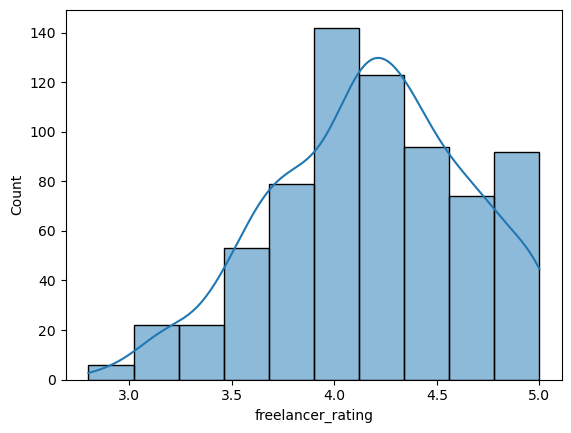

In [16]:
sns.histplot(job_df['freelancer_rating'],bins=10,kde=True)
plt.show()

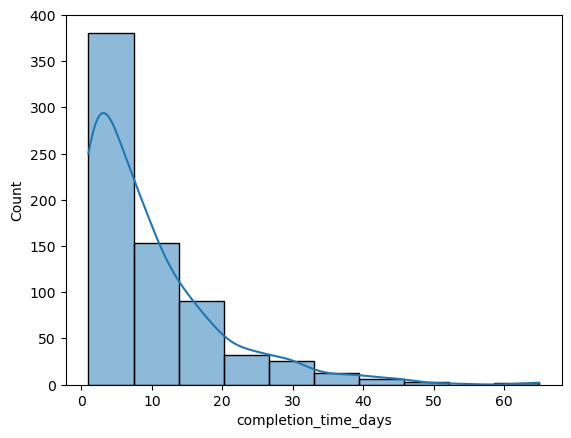

In [17]:
sns.histplot(job_df['completion_time_days'],bins=10,kde=True)
plt.show()

In [18]:
for col in columns:
    median_val=job_df[col].median()
    job_df[col].fillna(median_val,inplace=True)
    

C:\Users\RASHID\AppData\Local\Temp\ipykernel_14648\909013848.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  job_df[col].fillna(median_val,inplace=True)


In [19]:
# CHECK ALL MISSING VALUES ARE HANDILED

In [20]:
job_df.isnull().sum()

job_id                  0
job_title               0
job_description         0
category                0
posted_date             0
budget_usd              0
duration_days           0
num_applicants          0
hired                   0
freelancer_rating       0
completion_time_days    0
success                 0
dtype: int64

<div style="background-color:#FFE5B4; color:gold; padding:15px; border-radius:8px; text-align:center; font-size:24px; font-weight:bold;">
    GROUPING
</div>


In [21]:
 # GROUPING CATEGOY WITH SOME NUMERICAL COLUMNS FOR COMPERING

In [22]:
job_df.groupby('category')[['budget_usd','duration_days','num_applicants','freelancer_rating','completion_time_days']].median()

,budget_usd,duration_days,num_applicants,freelancer_rating,completion_time_days
category,,,,,
Data Science,536.760,7.0,6.0,4.2,7.0
Design,519.610,7.0,7.0,4.2,7.0
Development,503.860,8.0,7.0,4.2,7.0
Marketing,514.010,6.0,7.0,4.2,7.0
Translation,538.220,6.0,7.0,4.2,7.0
Video Editing,494.435,6.0,7.0,4.2,7.0
Writing,488.535,5.0,7.0,4.2,7.0


Budget: $489–$538 (highest in Translation, lowest in Writing)

Duration: 5–8 days (shortest Writing, longest Development)

Applicants: 6–7 (lowest in Data Science)

Freelancer Rating: 4.2 for all categories

Completion Time: Around 7 days for all

<div style="background-color:#FFE5B4; color:gold; padding:15px; border-radius:8px; text-align:center; font-size:22px; font-weight:bold;">
    DATA VISUALISATION THROUGH UNIVARIATE, BIVARIATE AND MULTIVARIATE PLOTS
</div>


## UNIVARIATE PLOTS:

### DISTPLOT

C:\Users\RASHID\AppData\Local\Temp\ipykernel_14648\1839650410.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(job_df['completion_time_days'],kde=True,bins=10)


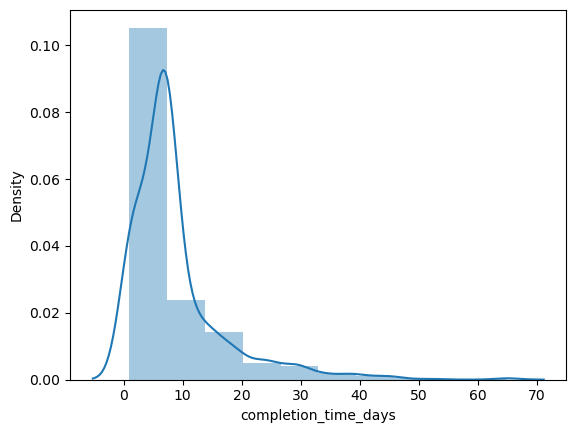

In [23]:
sns.distplot(job_df['completion_time_days'],kde=True,bins=10)
plt.show()

completion_time_days	(Actual number of days taken to complete the job.) 1 to 10 range days is high density,10 to 70 is very low and redusing their range

### COUNTPLOT

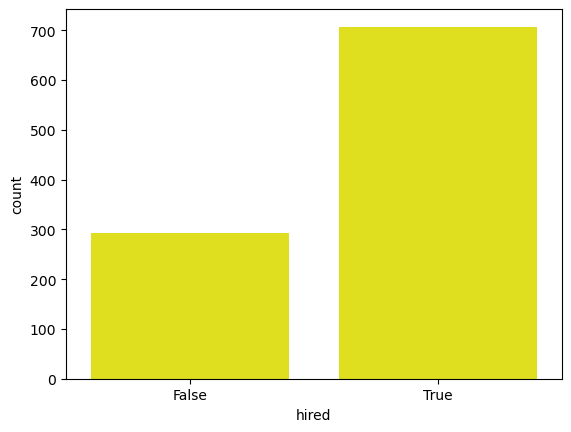

In [24]:
sns.countplot(x='hired',data=job_df,color='yellow')
plt.show()

hired freelancers  are more than unhired freelancers

## BIVARIATE PLOTS:

### KDE PLOT

C:\Users\RASHID\AppData\Local\Temp\ipykernel_14648\702670237.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=job_df, x='num_applicants', hue='hired', shade=True)


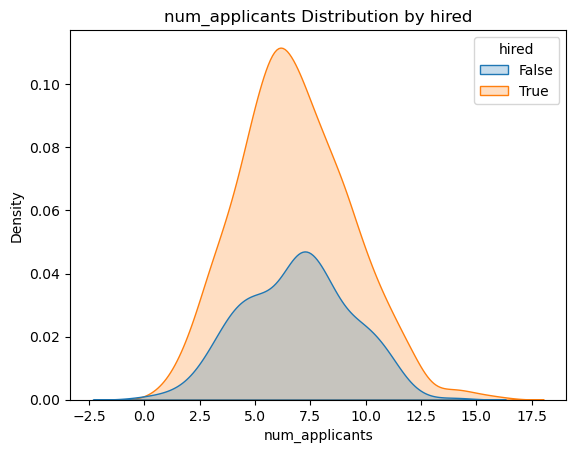

In [25]:
sns.kdeplot(data=job_df, x='num_applicants', hue='hired', shade=True)
plt.title("num_applicants Distribution by hired")
plt.show()

more density is hired than unhired,num_applicants	(Number of freelancers who applied for the job) is 5 to 10 range is high and other range is low and decreasing

### BARPLOT

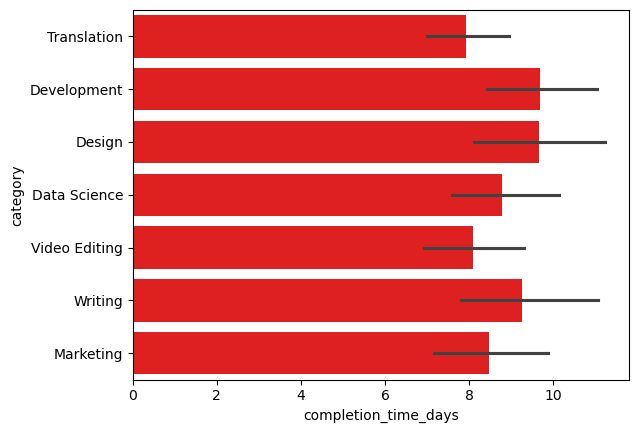

In [26]:
sns.barplot(x='completion_time_days',y='category',data=job_df,color='red')
plt.show()

📊 Plot Summary: Job Completion Time
The plot visualizes the average number of days it takes to complete a job across seven different professional categories in a freelance dataset.

X-axis: completion_time_days (The average actual number of days taken to complete the job).

y-axis: category (The type of freelance job: Translation, Development, Design, etc.).

Error Bars: The thin black lines on top of the bars represent the standard deviation or variability of the completion time within that category.

⏳ Completion Time Comparison by Job Category
Fastest Completion:

Translation has the lowest average completion time, at approximately 8.0 days.

This suggests that translation tasks are generally the most straightforward and least prone to extended revisions or complexities.

Slowest Completion:

Development and Design jobs are the slowest, both averaging close to 9.5 to 9.8 days.

These categories often require complex, iterative work (coding, testing, mockups, revisions) that naturally extends the project duration.

Highest Variability (Uncertainty):

Design and Data Science show the longest error bars (the thin black lines on top of the bars).

This indicates the highest variance in completion time; projects in these fields can finish quickly or take significantly longer than the average, suggesting high schedule risk.

Lowest Variability (Predictability):

Translation has the shortest error bar, confirming its completion time is not only fast but also highly predictable.

Mid-Range Categories:

Video Editing, Writing, and Marketing fall into the mid-range, averaging between 8.5 and 9.5 days. Their variability is lower than Design or Data Science but higher than Translation.

The average time difference between the fastest (Translation) and the slowest (Development/Design) categories is only about 1.5 to 1.8 days, but the risk of a major delay (indicated by the error bars) is much greater in Design and Data Science.

### VIOLINPLOT

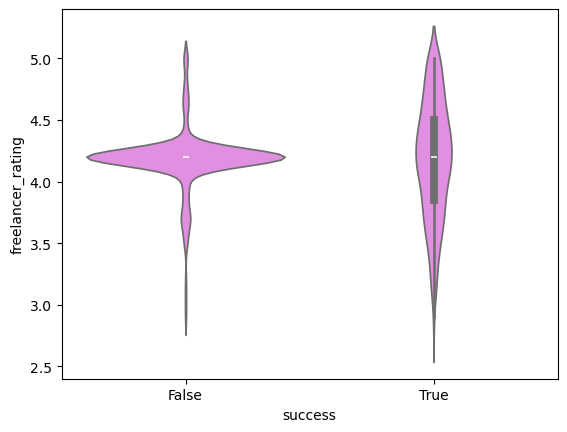

In [27]:
sns.violinplot(x='success', y='freelancer_rating', data=job_df,color='violet')-
plt.show()


🎻 . Violin Plot: Freelancer Rating vs. Success
The Violin Plot compares the distribution of freelancer ratings based on whether the job was completed successfully (True) or failed (False).

Summary: The successful jobs show a rating distribution that is tighter and centered higher, while unsuccessful jobs show a wider, more spread-out distribution, including more low ratings.

Key Insights:

Rating Predicts Success: A freelancer's rating is a strong indicator of job success.

Higher Median for Success: The center of the distribution for successful jobs is higher (median closer to 4.3) than for unsuccessful jobs (median closer to 4.2).

Lower-Rated Risk: Projects handled by lower-rated freelancers (ratings below 4.0) are significantly more likely to end in failure.

## MULTIVARIATE PLOTS:

### BOXPLOT

C:\Users\RASHID\AppData\Local\Temp\ipykernel_14648\1956759045.py:1: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:yellow'` for the same effect.

  sns.boxplot(x='budget_usd',y='category',data=job_df,hue='success',color='yellow')


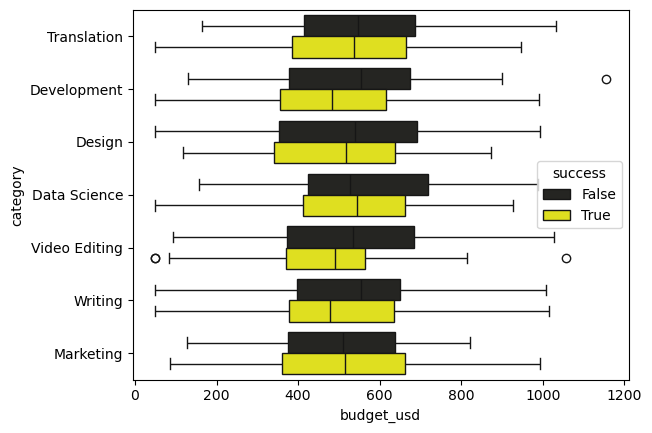

In [28]:
sns.boxplot(x='budget_usd',y='category',data=job_df,hue='success',color='yellow')
plt.show()

📊 Plot Summary (Short Version)

The Seaborn boxplot shows how  The job’s budget in US dollars. vary across different categories, with each category further split into Successful and Unsuccessful (if the job was successfully completed (1 = yes, 0 = no)).
.

X-axis: budget_usd (The job’s budget in US dollars)

Y-axis: category (The job’s type or category)

Hue: success (success status, color-coded)

🔎 What the Boxplot Shows

Each colored box represents the budget distribution for one Category × Success group:

Median Line: Typical budget level

Box (IQR): Middle 50% of budgets

Whiskers: Range of most data points

Dots: Outliers (unusually high or low budgets)

💡 Key Insights

Development & Data Science: These categories are likely to show the highest median budgets and the greatest number of high-budget outliers, reflecting the cost of specialized technical skills.

Translation & Writing: These services are generally expected to have the lowest median budgets and the narrowest budget distributions.

Marketing, Design, Video Editing: These are likely to occupy a mid-range budget bracket, with Design and Video Editing possibly showing higher variability due to the scope of creative projects.


$. Success vs. Budget Gap
Higher Budget → Higher Success Median: For most categories, the median budget for successful jobs (1) would be measurably higher than the median budget for unsuccessful jobs (0).

Interpretation: Higher investment often correlates with higher quality, more experienced freelancers, or better-defined project scopes, leading to successful completion.

Gap Size Varies: The budget gap between successful and unsuccessful jobs is likely to be narrower in high-demand/high-cost fields (like Development) where even low-budget projects may attract talent, and wider in saturated fields (like Writing or Translation).

$. Outliers and Risk
Successful Outliers: The most extreme high-budget projects will primarily belong to the successful group across all categories, especially in Development and Data Science.

Interpretation: Clients generally ensure their largest investments are seen through to completion.

Unsuccessful Outliers: Unsuccessful jobs are likely to cluster at the lower end of the budget spectrum, suggesting that very low budget offers are associated with the highest risk of non-completion.



### HEATMAP

In [29]:
cols = ['budget_usd', 'duration_days', 'num_applicants','freelancer_rating', 'completion_time_days','success','hired']


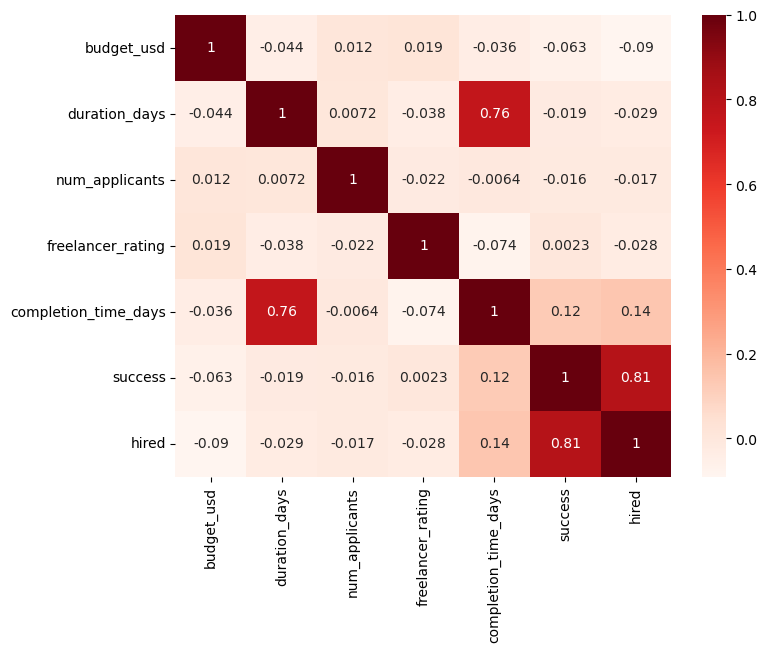

In [30]:
plt.figure(figsize=(8,6))
gob_hmap = job_df[cols].corr()   # col must be a list!
sns.heatmap(gob_hmap, annot=True, cmap='Reds')
plt.show()

:

💡 Key Takeaways – Correlation Heatmap

What it Shows: Strength and direction of linear relationships between every pair of variables in the dataset.

Color Meaning:

Dark Red/Purple (e.g., 0.86, 0.95): Strong positive correlation (variables increase together, e.g., rating & interview).

Dark Blue (e.g., −0.91): Strong negative correlation (one variable increases as the other decreases, e.g., time & rating).

Light/Neutral: Weak or no correlation (near 0).

Core Insight: Interview score is the most important factor for rating (r = 0.95), and higher rating is associated with less time spent (r = −0.91).

📊 Insights

Strong Positive Correlations (Darker Color/High Value):

success and hired (The cell shows 0.86). This suggests that a successful outcome is strongly associated with being hired.

rating and interview (The cell shows 0.95). This indicates that a high interview score is very strongly associated with a high rating.

Strong Negative Correlations (Cooler Color/Low Negative Value):

time and rating (The cell shows -0.91). This indicates that the time variable (perhaps time spent on the process, or a time-related performance metric) has a very strong inverse relationship with the rating. As one increases, the other decreases significantly.

## CLEARING DATA SET

In [31]:
job_df

,job_id,job_title,job_description,category,posted_date,budget_usd,duration_days,num_applicants,hired,freelancer_rating,completion_time_days,success
0,JOB00001,English to Spanish,This project involves english to spanish in th...,Translation,2025-07-17,599.34,13,3,True,4.1,14.0,True
1,JOB00002,Mobile App Development,This project involves mobile app development i...,Development,2025-10-12,702.10,12,4,False,4.2,7.0,False
2,JOB00003,English to Spanish,This project involves english to spanish in th...,Translation,2025-10-09,385.72,7,6,True,3.7,5.0,True
3,JOB00004,UI/UX Design,This project involves ui/ux design in the fiel...,Design,2025-11-19,619.54,7,4,True,3.9,10.0,True
4,JOB00005,Model Training,This project involves model training in the fi...,Data Science,2025-06-01,558.21,5,4,False,4.2,7.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...
995,JOB00996,Promo Video Creation,This project involves promo video creation in ...,Video Editing,2025-10-03,415.47,2,10,True,3.4,8.0,True
996,JOB00997,German to Italian,This project involves german to italian in the...,Translation,2025-07-26,719.76,1,7,False,4.2,7.0,False
997,JOB00998,Model Training,This project involves model training in the fi...,Data Science,2025-09-11,597.77,1,6,False,4.2,7.0,False
998,JOB00999,Blog Writing,This project involves blog writing in the fiel...,Writing,2025-06-25,410.22,2,10,True,4.0,4.0,True


In [32]:
job_df['posted_date']=pd.to_datetime(job_df['posted_date'])

In [33]:
job_df['year']=job_df['posted_date'].dt.year

In [34]:
job_df['day']=job_df['posted_date'].dt.day

In [35]:
job_df['month']=job_df['posted_date'].dt.month

In [36]:
job_df.drop(['job_id','job_title','job_description','posted_date'],axis=1,inplace=True)

In [37]:
job_df['hired'] =job_df['hired'].astype(int)
job_df['success'] =job_df['success'].astype(int)

In [38]:
job_df.drop('year',axis=1,inplace=True)

In [39]:
job_df

,category,budget_usd,duration_days,num_applicants,hired,freelancer_rating,completion_time_days,success,day,month
0,Translation,599.34,13,3,1,4.1,14.0,1,17,7
1,Development,702.10,12,4,0,4.2,7.0,0,12,10
2,Translation,385.72,7,6,1,3.7,5.0,1,9,10
3,Design,619.54,7,4,1,3.9,10.0,1,19,11
4,Data Science,558.21,5,4,0,4.2,7.0,0,1,6
...,...,...,...,...,...,...,...,...,...,...
995,Video Editing,415.47,2,10,1,3.4,8.0,1,3,10
996,Translation,719.76,1,7,0,4.2,7.0,0,26,7
997,Data Science,597.77,1,6,0,4.2,7.0,0,11,9
998,Writing,410.22,2,10,1,4.0,4.0,1,25,6


<div style="background-color:blue; color:gold; padding:15px; border-radius:8px; text-align:center; font-size:24px; font-weight:bold;">
    ENCODING
</div>


In [40]:
le=LabelEncoder()

In [41]:
job_df['category']=le.fit_transform(job_df['category'])

In [42]:
job_df

,category,budget_usd,duration_days,num_applicants,hired,freelancer_rating,completion_time_days,success,day,month
0,4,599.34,13,3,1,4.1,14.0,1,17,7
1,2,702.10,12,4,0,4.2,7.0,0,12,10
2,4,385.72,7,6,1,3.7,5.0,1,9,10
3,1,619.54,7,4,1,3.9,10.0,1,19,11
4,0,558.21,5,4,0,4.2,7.0,0,1,6
...,...,...,...,...,...,...,...,...,...,...
995,5,415.47,2,10,1,3.4,8.0,1,3,10
996,4,719.76,1,7,0,4.2,7.0,0,26,7
997,0,597.77,1,6,0,4.2,7.0,0,11,9
998,6,410.22,2,10,1,4.0,4.0,1,25,6


<div style="background-color:blue; color:gold; padding:15px; border-radius:8px; text-align:center; font-size:24px; font-weight:bold;">
    SCALING
</div>


In [43]:
scaler=MinMaxScaler()

In [44]:
scaled=scaler.fit_transform(job_df)
scaled

array([[0.66666667, 0.49701433, 0.17142857, ..., 1.        , 0.53333333,
        0.33333333],
       [0.33333333, 0.58998625, 0.15714286, ..., 0.        , 0.36666667,
        0.83333333],
       [0.66666667, 0.30374204, 0.08571429, ..., 1.        , 0.26666667,
        0.83333333],
       ...,
       [0.        , 0.49559388, 0.        , ..., 0.        , 0.33333333,
        0.66666667],
       [1.        , 0.32590837, 0.01428571, ..., 1.        , 0.8       ,
        0.16666667],
       [0.83333333, 0.37323574, 0.        , ..., 0.        , 0.23333333,
        0.83333333]])

In [45]:
job_df=pd.DataFrame(scaled,columns=job_df.columns)

In [46]:
job_df

,category,budget_usd,duration_days,num_applicants,hired,freelancer_rating,completion_time_days,success,day,month
0,0.666667,0.497014,0.171429,0.1875,1.0,0.590909,0.203125,1.0,0.533333,0.333333
1,0.333333,0.589986,0.157143,0.2500,0.0,0.636364,0.093750,0.0,0.366667,0.833333
2,0.666667,0.303742,0.085714,0.3750,1.0,0.409091,0.062500,1.0,0.266667,0.833333
3,0.166667,0.515290,0.085714,0.2500,1.0,0.500000,0.140625,1.0,0.600000,1.000000
4,0.000000,0.459802,0.057143,0.2500,0.0,0.636364,0.093750,0.0,0.000000,0.166667
...,...,...,...,...,...,...,...,...,...,...
995,0.833333,0.330658,0.014286,0.6250,1.0,0.272727,0.109375,1.0,0.066667,0.833333
996,0.666667,0.605964,0.000000,0.4375,0.0,0.636364,0.093750,0.0,0.833333,0.333333
997,0.000000,0.495594,0.000000,0.3750,0.0,0.636364,0.093750,0.0,0.333333,0.666667
998,1.000000,0.325908,0.014286,0.6250,1.0,0.545455,0.046875,1.0,0.800000,0.166667


<div style="background-color:blue; color:gold; padding:15px; border-radius:8px; text-align:center; font-size:24px; font-weight:bold;">
   MODEL BUILDING
</div>

In [47]:
# make independent variable x column and dependent variable y column

In [48]:
x=job_df.drop(['success'],axis=1)
x

,category,budget_usd,duration_days,num_applicants,hired,freelancer_rating,completion_time_days,day,month
0,0.666667,0.497014,0.171429,0.1875,1.0,0.590909,0.203125,0.533333,0.333333
1,0.333333,0.589986,0.157143,0.2500,0.0,0.636364,0.093750,0.366667,0.833333
2,0.666667,0.303742,0.085714,0.3750,1.0,0.409091,0.062500,0.266667,0.833333
3,0.166667,0.515290,0.085714,0.2500,1.0,0.500000,0.140625,0.600000,1.000000
4,0.000000,0.459802,0.057143,0.2500,0.0,0.636364,0.093750,0.000000,0.166667
...,...,...,...,...,...,...,...,...,...
995,0.833333,0.330658,0.014286,0.6250,1.0,0.272727,0.109375,0.066667,0.833333
996,0.666667,0.605964,0.000000,0.4375,0.0,0.636364,0.093750,0.833333,0.333333
997,0.000000,0.495594,0.000000,0.3750,0.0,0.636364,0.093750,0.333333,0.666667
998,1.000000,0.325908,0.014286,0.6250,1.0,0.545455,0.046875,0.800000,0.166667


In [49]:
y=job_df['success']
y

0      1.0
1      0.0
2      1.0
3      1.0
4      0.0
      ... 
995    1.0
996    0.0
997    0.0
998    1.0
999    0.0
Name: success, Length: 1000, dtype: float64

In [50]:
y.unique()

array([1., 0.])

In [51]:
# set train_test_split in independet and deoendent variables

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [54]:
from sklearn.linear_model import LogisticRegression

****LogisticRegression****

In [55]:
model=LogisticRegression()

In [56]:
model = model.fit(x_train,y_train)


In [57]:
y_pred = model.predict(x_test)


In [58]:
from sklearn.metrics import accuracy_score

In [59]:
acc=accuracy_score(y_test,y_pred)

In [60]:
acc

0.895

In [61]:
new_data=[[0.25,0.304912,0.636364,-1.333333,0.0,-0.25,1.166667,0.0625,-0.333333]]

In [62]:
predict=model.predict(new_data)
predict

C:\Users\RASHID\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0.])

****RandomForestClassifier****

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
from sklearn.metrics import accuracy_score, classification_report

In [65]:

rf_cr = RandomForestClassifier(n_estimators=100, random_state=42)
rf_cr=rf_cr.fit(x_train, y_train)
rf_cr

RandomForestClassifier(random_state=42)

In [66]:
y_pred_rf = rf_cr.predict(x_test)

In [67]:
acc_rf = accuracy_score(y_test, y_pred_rf)

In [68]:
acc_rf

0.895

****DicisionTreeClassifier****

In [69]:
from sklearn.tree import DecisionTreeClassifier

In [70]:
model2 = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42)

In [71]:
model2.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [72]:
y_pred_dt=model2.predict(x_test)

In [73]:
acc_dt = accuracy_score(y_test, y_pred_dt)
acc_dt

0.89

****SVM (linear and rbf)****

In [74]:
from sklearn.svm import SVC

In [75]:
svc_l=SVC(kernel='linear')

In [76]:
svc_l=svc_l.fit(x_train,y_train)

In [77]:
yl_pred=svc_l.predict(x_test)

In [78]:
acc_svcl=accuracy_score(y_test,yl_pred)

In [79]:
acc_svcl

0.895

In [80]:
svc_rbf=SVC(kernel='rbf')

In [81]:
svc_rbf=svc_rbf.fit(x_train,y_train)

In [82]:
yr_pred=svc_rbf.predict(x_test)

In [83]:
acc_svcr=accuracy_score(y_test,yr_pred)

In [84]:
acc_svcr

0.895

****KNeighborsClassifier****

In [85]:
from sklearn.neighbors import KNeighborsClassifier

In [86]:
metric_k=[]
neighbors=np.arange(3,15)

In [87]:
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='euclidean')
    classifier.fit(x_train,y_train)
    y_pred_knn=classifier.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred_knn)
    metric_k.append(accuracy)

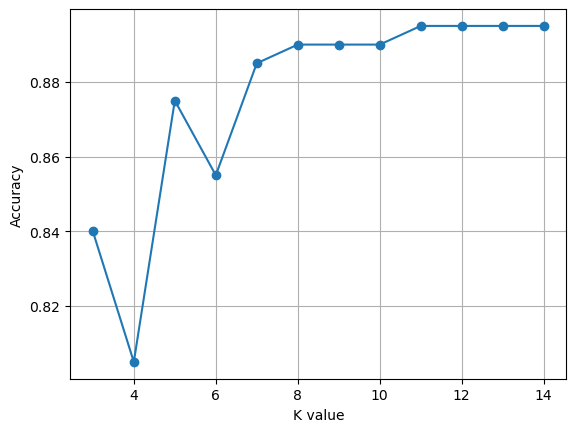

In [88]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

In [89]:
classifier=KNeighborsClassifier(n_neighbors=13,metric='euclidean')
knn=classifier.fit(x_train,y_train)
y_prediction=classifier.predict(x_test)

In [90]:
KNN_acc=accuracy_score(y_test,y_prediction)
KNN_acc

0.895

****XGBClassifier****

In [91]:
from xgboost import XGBClassifier

In [92]:
model=XGBClassifier()

In [93]:
model=model.fit(x_train,y_train)

In [94]:
y_pred=model.predict(x_test)

In [95]:
acc_xg=accuracy_score(y_test,y_pred)

In [96]:
acc_xg

0.87

****CatBoostClassifier****

In [97]:
from catboost import CatBoostClassifier

In [98]:
model=CatBoostClassifier(verbose=0)

In [99]:
model=model.fit(x_train,y_train)

In [100]:
y_pred=model.predict(x_test)

In [101]:
acc_cat=accuracy_score(y_test,y_pred)

In [102]:
acc_cat

0.895

****lightgbm****

In [103]:
import lightgbm as lgb 

In [104]:
modellg=lgb.LGBMClassifier(verbose=0)

In [105]:
modellg=modellg.fit(x_train,y_train)

C:\Users\RASHID\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\RASHID\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\RASHID\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\RASHID\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [106]:
y_pred=modellg.predict(x_test)

In [107]:
acc_light=accuracy_score(y_test,y_pred)

In [108]:
acc_light

0.88

***TABLE OF ACCURACY SCORE OF EVERY MODEL***

In [109]:
from tabulate import tabulate
table=[['Model','Accuracy'],['Logistic Regression',acc],['RandomForest',acc_rf],['DicisionTree',acc_dt],['SVM_L',acc_svcl],['SVM_R',acc_svcr],
       ['KNN',KNN_acc],['xgboost',acc_xg],['Catboost',acc_cat],['lightbgm',acc_light]]
print(tabulate(table,headers='firstrow',tablefmt='fancy_grid'))

╒═════════════════════╤════════════╕
│ Model               │   Accuracy │
╞═════════════════════╪════════════╡
│ Logistic Regression │      0.895 │
├─────────────────────┼────────────┤
│ RandomForest        │      0.895 │
├─────────────────────┼────────────┤
│ DicisionTree        │      0.89  │
├─────────────────────┼────────────┤
│ SVM_L               │      0.895 │
├─────────────────────┼────────────┤
│ SVM_R               │      0.895 │
├─────────────────────┼────────────┤
│ KNN                 │      0.895 │
├─────────────────────┼────────────┤
│ xgboost             │      0.87  │
├─────────────────────┼────────────┤
│ Catboost            │      0.895 │
├─────────────────────┼────────────┤
│ lightbgm            │      0.88  │
╘═════════════════════╧════════════╛


***PLOT A GRAPH OF ACCURACY SCORE OF EACH MODELS***

C:\Users\RASHID\AppData\Local\Temp\ipykernel_14648\533449546.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracy, palette='viridis')


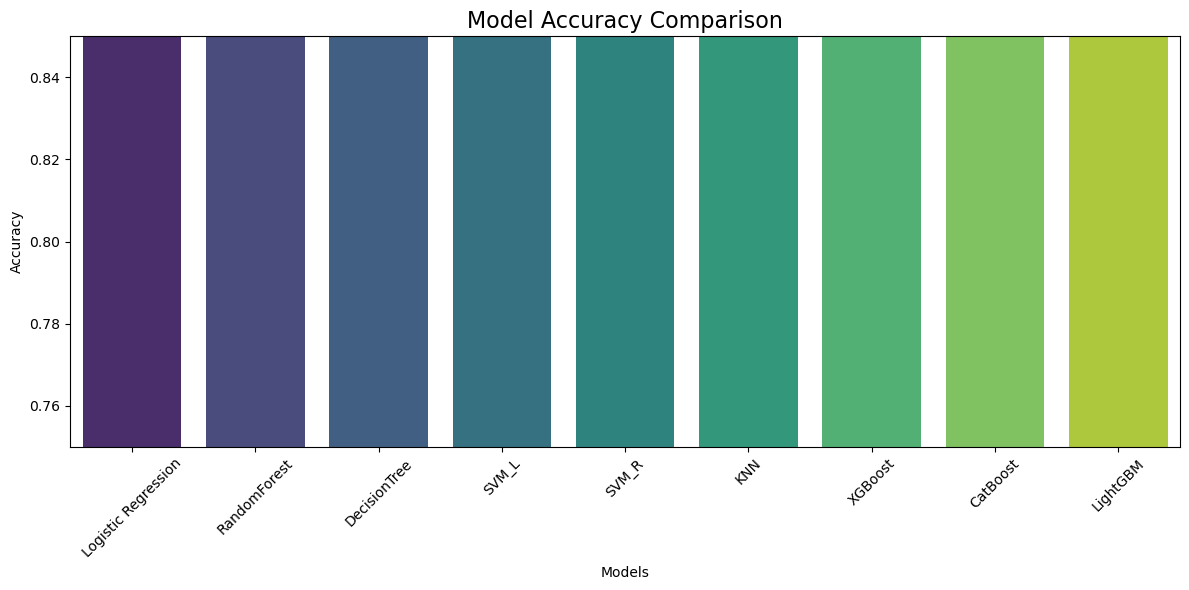

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data
models = ['Logistic Regression','RandomForest','DecisionTree','SVM_L','SVM_R',          'KNN','XGBoost','CatBoost','LightGBM']
accuracy = [ 0.895, 0.895, 0.89, 0.895, 0.895,
             0.895,0.87 ,0.895, 0.88 ]

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x=models, y=accuracy, palette='viridis')
plt.xticks(rotation=45)
plt.title("Model Accuracy Comparison", fontsize=16)
plt.ylabel("Accuracy")
plt.xlabel("Models")
plt.ylim(0.75, 0.85)
plt.tight_layout()
plt.show()


<div style="background-color:blue; color:gold; padding:15px; border-radius:8px; text-align:center; font-size:24px; font-weight:bold;">
    HYPER PARAMETER TUNING
</div>


**Using RandomizedSearchCV**

In [112]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV


In [113]:
rf = RandomForestClassifier()

In [114]:
param_dist = {
    'n_estimators': [100, 300, 500, 1000],
    'max_depth': [None, 10, 20, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
}

In [115]:
rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,
    scoring='accuracy',
    cv=3,
    n_jobs=-1,
    verbose=2,
    random_state=42
)

rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30, 50],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 300, 500, 1000]},
                   random_state=42, scoring='accuracy', verbose=2)

In [116]:
print("Results from Rndom search Cv \n")
print(" the best estimator params :",rf_random.best_estimator_)
print("best  accroccy_score:   ",rf_random.best_score_)
print("Best parameters:", rf_random.best_params_)

Results from Rndom search Cv 

 the best estimator params : RandomForestClassifier(max_depth=20, min_samples_leaf=2, n_estimators=300)
best  accroccy_score:    0.9075356931654981
Best parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 20}


In [117]:
MODEL=RandomForestClassifier(n_estimators=500,min_samples_split=10,min_samples_leaf=2,max_features=None,max_depth=30)

In [118]:
MODEL=MODEL.fit(x_train,y_train)

In [119]:
y_pred_M=MODEL.predict(x_test)

In [120]:
acc_MODEL=accuracy_score(y_test,y_pred_M)

In [121]:
acc_MODEL

0.895

****no change in hyper parameter tuning,so ,and using the previous model Random Forest****


** No changes were made to the hyperparameter tuning. The previously trained Random Forest model, with its best-found parameters, was used to fit the training data, make predictions on the test set, and evaluate the model’s performance. This approach ensures consistency and allows us to assess the model’s accuracy and reliability on unseen data. **

In [122]:
acc_rf = accuracy_score(y_test, y_pred_rf)
acc_rf

0.895

In [123]:
from sklearn.metrics import precision_score

In [124]:
pre_rf=precision_score(y_test,y_pred_rf)
pre_rf

0.8571428571428571

In [125]:
from sklearn.metrics import recall_score

In [126]:
re_rf=recall_score(y_test,y_pred_rf)
re_rf
                        

1.0

In [127]:
from sklearn.metrics import f1_score

In [128]:
f1_rf=f1_score(y_test,y_pred_rf)
f1_rf

0.9230769230769231

In [129]:
from sklearn.metrics import roc_curve,auc 
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf) 
roc_auc = auc(fpr, tpr) 
print(roc_auc)

0.8581081081081081


C:\Users\RASHID\AppData\Local\Temp\ipykernel_14648\3350403199.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


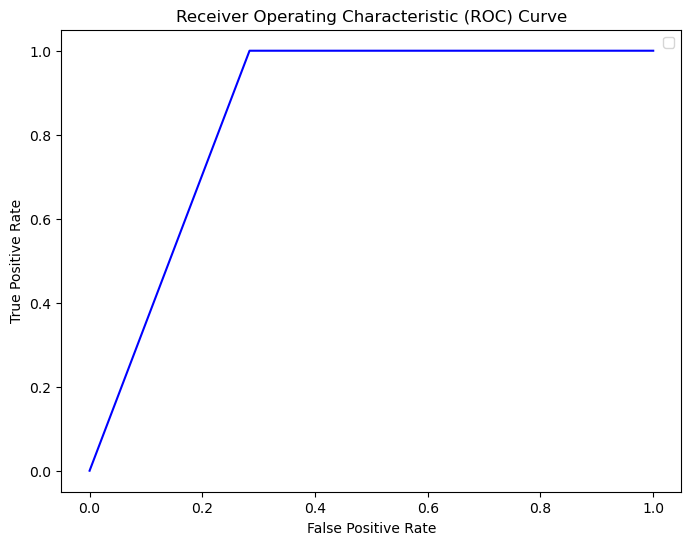

In [130]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(8, 6)) 
plt.plot(fpr, tpr, color='blue') 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend() 
plt.show()

In [131]:
from sklearn.metrics import confusion_matrix


In [132]:
cm = confusion_matrix(y_test, y_pred_rf,labels=[0,1])
cm


array([[ 53,  21],
       [  0, 126]])

<div style="background-color:blue; color:gold; padding:15px; border-radius:8px; text-align:center; font-size:24px; font-weight:bold;">
   # PREDICTION
</div>

In [133]:
cat_values=[['Translation',599.34,13,3,1,4.1,14.0,17,7]]

In [134]:
df_cat=pd.DataFrame(cat_values,columns=['category', 'budget_usd', 'duration_days', 'num_applicants', 'hired',
       'freelancer_rating', 'completion_time_days',  'day', 'month'])

In [135]:
df_cat['category']=le.fit_transform(df_cat['category'])

In [136]:
pred=rf_cr.predict(df_cat)

In [137]:
pred

array([1.])

In [138]:
result="yes,success" if pred == 1 else "No,unsuccess"

In [139]:
result

'yes,success'